# Edunet Foundation 


<h2 align="center">Multiple Linear Regression</h2>

1. Supervised Learning Algorithm
2. The response/the value to be precited is continuous (quantitaive) in nature

The dataset being used is an advertisement dataset, in which the dependent variable is sales (the amount of sales generated, by using the three advertisement channels - TV, Radio, Newspaper

### Task 1: Importing the libraries
---

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Task 2: Loading the dataset and performing basic explorations to get an idea about the dataset

In [2]:
advertisement = pd.read_csv('/Users/priyashaprasad/Documents/Summer Analytics Course/SLR/Linear_Regression/Advertising.csv')

In [3]:
advertisement.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


The values of all the features are numeric

In [4]:
advertisement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
advertisement.shape

(200, 5)

In [6]:
advertisement.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [7]:
advertisement.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

The dataset consists of 5 columns and 200 records and there are no null values in the dataset

In [8]:
advertisement.columns

Index([u'Unnamed: 0', u'TV', u'radio', u'newspaper', u'sales'], dtype='object')

We see that there are 5 columns and the first column - appears to be as unnamed in the dataset. Since we have 
an index column in pandas, we will drop the unnamed column which is not required for modelling and also because it is redundant.

In [9]:
advertisement.drop(['Unnamed: 0'], axis =1, inplace = True)


In [10]:
advertisement.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
advertisement.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Task 3: Exploratory Data Analysis

# An EDA checklist
1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?

The first three questions of the EDA checklist could be answered as a result of our initial analysis.

1. We are trying to build a linear regression model to predict the value of sales generated by using TV, Radio 
and Newspaper advertisement channels
2. We have the advertisement dataset consisting of 200 observations and all the features are numeric
3. There are no missing values in the dataset



In [12]:
import seaborn as sns

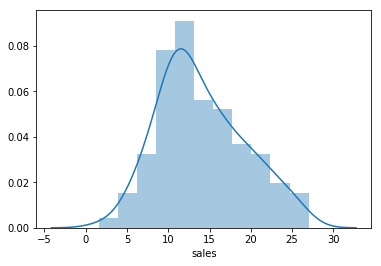

In [13]:
sns.distplot(advertisement.sales);

The distribution of the sales variable appears to be fairly symmetrical 

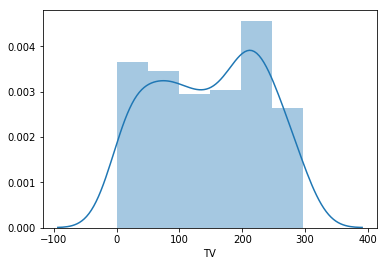

In [14]:
sns.distplot(advertisement.TV);

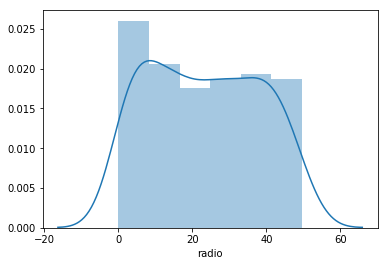

In [15]:
sns.distplot(advertisement.radio);

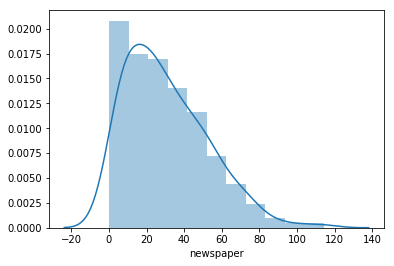

In [16]:
 sns.distplot(advertisement.newspaper);

1. The distribution of the newspaper is slightly right skewed and 
2. The mean is greater thant that of the median

Exploring Relationships between Sales and the other input variables

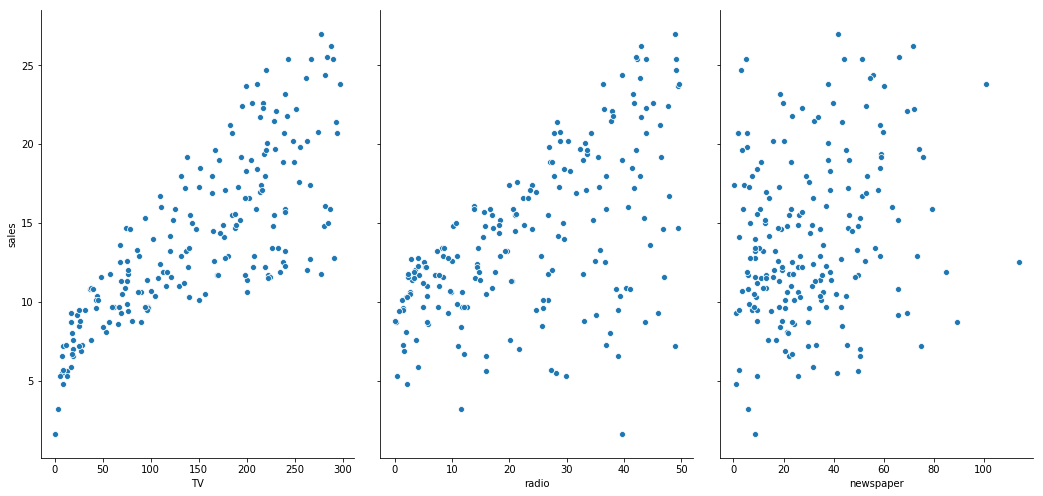

In [17]:
sns.pairplot(advertisement, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7, aspect=0.7);

1. The relationship between TV and sales is fairly linear
2. The relationship between Radio and sales is also fairly linear with quite few outliers
3. The relationship between newspaper and sales is some what scattered, no strong linear relationship 

The correlations here suggest associations/relations and does not imply direct causation

Since it is a simple linear regression problem, the model will contain only one independent variable.
To find that one variable among the three available input variables, we check the strength of 
linear relationship/correlation between the three predictor variables and sales

In [18]:
advertisement.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


From the above table, we see that the variable that is strongly correlated with sales is TV. So we will be using 
the TV variable to be our input variable.

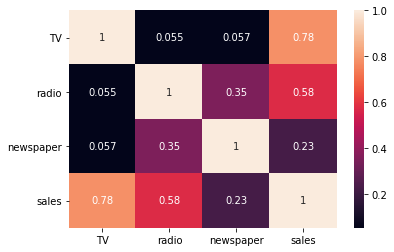

In [19]:
sns.heatmap( advertisement.corr(), annot=True );

### Task 4: Creating a Simple Linear Regression Model to predict sales

In [20]:
#slicing the TV column
X = advertisement[['TV','radio','newspaper']]
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [21]:
# check the type and shape of X
#type changes from being a series to a DataFrame
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [22]:
y = advertisement['sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [23]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Task 5 : Interpreting Model Coefficients

In [38]:
# print the intercept and coefficients
print(model.intercept_)
print(model.coef_)

2.907947020816433
[0.0468431  0.17854434 0.00258619]


so the linear regression line of our model is 

sales = 2.907 + 0.047 (TV) + 0.178 (radio) + 0.0025 (newspaper)

# Interpretation: 

One "unit" increase in TV ad spending is associated with a 0.047 "unit" increase in Sales value of the prodcut

One "unit" increase in radio ad spending is associated with a 0.178 "unit" increase in Sales value of the prodcut

One "unit" increase in newspaper ad spending is associated with a 0.0025 "unit" increase in Sales value of the prodcut

### Task 6: Making Predictions with our Model

In [39]:
# using the predict method

y_pred = model.predict(X_test)

In [40]:
y_pred

array([21.73577184, 16.45693776,  7.65993185, 17.89202679, 18.67730671,
       23.86271904, 16.33623628, 13.45649226,  9.177296  , 17.36056228,
       14.4677995 ,  9.85697601, 17.26057027, 16.71866935, 15.09530285,
       15.58923732, 12.45188167, 17.27925151, 11.0944114 , 18.06889853,
        9.33433055, 12.91345761,  8.7842804 , 10.46670654, 11.40303174,
       15.03104665,  9.78479388, 19.46028647, 18.22954934, 17.1958903 ,
       21.60304218, 14.71901407, 16.29205532, 12.36432281, 19.98831261,
       15.37556411, 13.96678297, 10.06809496, 20.97197274,  7.45877832])

In [41]:
#Return the coefficient of determination R^2 of the prediction.
model.score( X_test, y_test)

0.8927605914615384

#Interpretation
1. The amount of ad spending on TV, radio, newspaper explains for 89.27% of variation in the sales value in the test data

In [45]:
model.score( X_train, y_train)

0.8959372632325174

#Interpretation
1. The amount of ad spending on TV, radio, newspaper explains for 89.59% of variation in the sales value in the training data

In [46]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
58,23.8,21.735772
40,16.6,16.456938
34,9.5,7.659932
102,14.8,17.892027
184,17.6,18.677307


### Task 7: Model Evaluation Metrics

In [44]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The coeeficient of determination r2:', metrics.r2_score(y_test, y_pred))

('Mean Absolute Error:', 1.0402154012924716)
('Mean Squared Error:', 1.99188555182879)
('Root Mean Squared Error:', 1.4113417558581585)
('The coeeficient of determination r2:', 0.8927605914615384)


**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

Our model performs fairly well on the test dataset